# Damped Pendulum (RK2 method)_submission


### According to Newton's Second law of motion 
 
$$\frac{d^2\theta}{dt^2}= -\frac{gsin\theta}{l}$$
We do not assume $\theta$ to be very small.
So we have a natural time scale:
$$ T= 2\pi\sqrt\frac{l}{g}$$
 

Now we define a dimensionless term $\tau$ such that:
$$\tau= \frac{t}{T}$$
Since, $\theta$ is already dimensionless. Hence,
$$\frac{d^2\theta}{d\tau^2}=-4\pi^2sin\theta$$
Now, we define dimensionless velocity $v$ such that 
$$\frac{d\theta}{d\tau}=v$$
$$\frac{dv}{d\tau}=-4\pi^2sin\theta-bv$$
Where the term $bv$ accounts for air drag.
Now, to keep a check on our values, we require something which remains constant with $\tau$. So we introduce the expression for mechanical energy
 $$ E=\frac{ml^2}{T^2}[0.5(\frac{d\theta}{d\tau})^2+4\pi^2(1-cos\theta)]$$

### Coupled first order differential equations

Consider the coupled equations

\begin{eqnarray}
\frac{dx}{dt} &=& f(x,y,t) \\
\frac{dy}{dt} &=& g(x,y,t)
\end{eqnarray}
The above ideas can easily be extended. For instance

\begin{eqnarray}
x(t+\Delta t) & \simeq & x(t) + \Delta t \ f\left(\ x(t+\Delta t/2),\ y(t+\Delta t/2), \ t+\Delta t/2 \ \right) \\
& \simeq & x(t) + \Delta t \ f\left(\ x(t)+\Delta t/2 \ \dot{x},y(t)+\Delta t/2  \ \dot{y}, t+\Delta t/2 \ \right) \\
&=& x(t) + \Delta t \ f\left(\ x(t)+\Delta t/2 \ f(x,y,t), \ y(t)+\Delta t/2  \ g(x,y,t),\ t+\Delta t/2 \ \right)
\end{eqnarray}
Similarly
$$ y(t+\Delta t) \simeq y(t) + \Delta t \ g\left(\ x(t)+\Delta t/2 \ f(x,y,t), \ y(t)+\Delta t/2  \ g(x,y,t),\ t+\Delta t/2 \ \right) $$

The corresponding algorithm is
\begin{eqnarray}
k_1 &=& \Delta t \ f(x,y,t) \\
q_1 &=& \Delta t \ g(x,y,t) \\
k_2 &=& \Delta t \ f\left(x+k_1/2, y+q_1/2, t+\Delta t/2\right) \\
q_2 &=& \Delta t \ g\left(x+k_1/2, y+q_1/2, t+\Delta t/2\right) \\
x(t+\Delta t) &=& x(t) + k_2 \\
y(t+\Delta t) &=& y(t) + q_2 
\end{eqnarray}

### Example: Damped Pendulum

The coupled equations are:
\begin{eqnarray}
\frac{d\theta}{d\tau} &=& v \\
\frac{dv}{d\tau} &=& -4 \pi^2 \sin\theta - bv
\end{eqnarray}
Here, $ f(\theta, v, \tau) = v $ and $g(\theta, v, \tau) = -4 \pi^2 \sin\theta - bv$

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(theta, vel, tau):
    return vel

def g(theta, vel, tau):
    return -4.*math.pi**2 * math.sin(theta) - b*vel

In [3]:
theta= 0.1 #INITIAL VALUE OF THETA AT T=0
vel= 0
b= 0.47 #coefficient of air drag
E= 0.5*vel**2 + 4*math.pi**2*(1-math.cos(theta))
tau= 0 #initial time instant
tau_final= 10 #final time instant upto which calculations are to be done
delta_tau= 0.01
N_slices= int(tau_final/delta_tau)
thetas= [theta]
vels= [vel]
Es= [E]
taus= [tau]

In [4]:
#implementingtheloopforrunge_kutta
for i in range(N_slices):
    k1 = delta_tau * f(theta, vel, tau)
    q1 = delta_tau * g(theta, vel, tau)
    k2 = delta_tau*f(theta+k1/2, vel+q1/2, tau+delta_tau/2)
    q2 = delta_tau*g(theta+k1/2, vel+q1/2, tau+delta_tau/2)
    theta += k2
    vel += q2
    E = 0.5*vel**2 + 4*math.pi**2*(1-math.cos(theta))
    tau += delta_tau
    thetas.append(theta)
    vels.append(vel)
    Es.append(E)
    taus.append(tau)

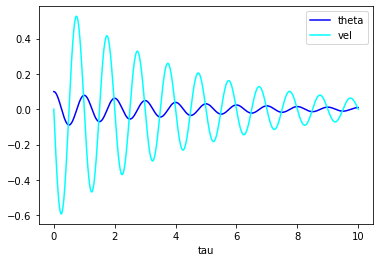

In [5]:
plt.xlabel('tau')
plt.plot(taus, thetas, linestyle='-', color='blue', label='theta')
plt.plot(taus, vels, linestyle='-', color='cyan', label='vel')
plt.legend();

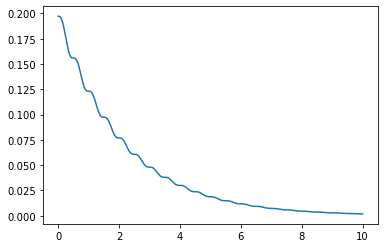

In [6]:
plt.plot(taus, Es);